# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [7]:
#reading File 5(a) and Copying the datataframe
df_task1=pd.read_csv('C:\\Users\\anmol\\Downloads\\5_Performance_metrics-20211106T140435Z-001\\5_Performance_metrics\\5_a.csv')
dfAUCTask1 = df_task1.copy(deep=True)

In [8]:
#This method is used to calculate tthe Basic Parameters like TN,TP,FN,FP, Confusion Matrix, Recall,F1 Score and Precision Score

def BasicParameters(df):
    df.loc[((df['proba']>=0.5)),'y_predicted'] = 1
    df['y_predicted'] = df['y_predicted'].fillna(0)
    
    #Molding DataFrame for TN,TP,FN and FP
    
    df['True_Positive'] = np.where((df['y']==1)&(df['y_predicted']==1),"Yes",np.nan)
    df['True_Negative'] = np.where((df['y']==0)&(df['y_predicted']==0),"Yes",np.nan)
    df['False_Positive'] = np.where((df['y']==0)&(df['y_predicted']==1),"Yes",np.nan)
    df['False_Negative'] = np.where((df['y']==1)&(df['y_predicted']==0),"Yes",np.nan)
    
    #Calculating TN,TP,FN and FP
    TP=df.loc[df.True_Positive == "Yes",'True_Positive'].count()
    TN=df.loc[df.True_Negative == "Yes",'True_Negative'].count()
    FP=df.loc[df.False_Positive == "Yes",'False_Positive'].count()
    FN=df.loc[df.False_Negative == "Yes",'False_Negative'].count()
    
    confusion_matrix= [[TN,FN],[FP,TP]]
    #Confusion Matrix
    print("Confusion Matrix is: ")
    print(confusion_matrix)
    
    #Calculation Precision
    precision = (TP)/(TP+FP)
    #Calculating Recall
    Recall = (TP)/(TP+FN)
    #Calculating F1 Score
    F1_Score = 2*((precision*Recall)/(Recall+precision))
    print("F1 Score is: "+str(F1_Score))
    
    Accuracy_Score = (TN+TP)/(TP+TN+FP+FN)
    print("Accuracy Score is: "+str(Accuracy_Score))
    df = pd.DataFrame(None)

BasicParameters(df_task1)

Confusion Matrix is: 
[[0, 0], [100, 10000]]
F1 Score is: 0.9950248756218906
Accuracy Score is: 0.9900990099009901


In [9]:
def compute_tpr_fpr(dataframe):
    dataframe['True_Positive'] = np.where((dataframe['y']==1)&(dataframe['y_predicted']==1),"Yes",np.nan)
    dataframe['True_Negative'] = np.where((dataframe['y']==0)&(dataframe['y_predicted']==0),"Yes",np.nan)
    dataframe['False_Positive'] = np.where((dataframe['y']==0)&(dataframe['y_predicted']==1),"Yes",np.nan)
    dataframe['False_Negative'] = np.where((dataframe['y']==1)&(dataframe['y_predicted']==0),"Yes",np.nan)
    
    #Calculating TN,TP,FN and FP
    TP=dataframe.loc[dataframe.True_Positive == "Yes",'True_Positive'].count()
    TN=dataframe.loc[dataframe.True_Negative == "Yes",'True_Negative'].count()
    FP=dataframe.loc[dataframe.False_Positive == "Yes",'False_Positive'].count()
    FN=dataframe.loc[dataframe.False_Negative == "Yes",'False_Negative'].count()
    TPR = TP/(FN+TP)
    FPR= FP/(FP+TN)
    dataframe = pd.DataFrame(None)
    return TPR,FPR

In [10]:
df3 = dfAUCTask1.copy(deep=True)
df2=df3.copy(deep=True)
predicted_prob = df2["proba"].values
thresholds = sorted(predicted_prob,reverse=True)

#Computing TPR and FPR Array
tpr_array = []
fpr_array =[]
for threshold in thresholds:
    df2=df3.copy(deep=True)
    threshold= threshold
    df2.loc[((df2['proba']>=threshold)),'y_predicted'] = 1
    df2['y_predicted'] =df2['y_predicted'].fillna(0)
    tpr,fpr = compute_tpr_fpr(df2)
    tpr_array.append(tpr)
    fpr_array.append(fpr)

In [11]:
pAUC = np.trapz(tpr_array, fpr_array)

print(pAUC)

0.48829900000000004


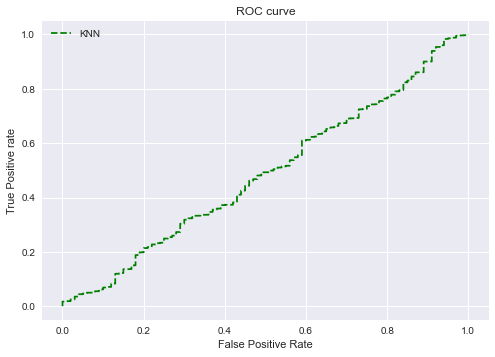

In [12]:
import scikitplot as skplt
import matplotlib.pyplot as plt

#y_true = df_task1["y"]
#y_probas = df_task1["proba"]
#skplt.metrics.plot_roc_curve(y_true, y_probas)
#plt.show()
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_array, tpr_array, linestyle='--',color='green', label='KNN')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [13]:
#reading File 5(b) and Copying the datataframe
df_task2=pd.read_csv('C:\\Users\\anmol\\Downloads\\5_Performance_metrics-20211106T140435Z-001\\5_Performance_metrics\\5_b.csv')
dfAUCTask2 = df_task2.copy(deep=True)

#Printinting Basic Parameters of Task -2
BasicParameters(df_task2)

Confusion Matrix is: 
[[9761, 45], [239, 55]]
F1 Score is: 0.2791878172588833
Accuracy Score is: 0.9718811881188119


In [14]:
df3_task2 = dfAUCTask2.copy(deep=True)
df2_task2=df3_task2.copy(deep=True)
predicted_prob = df2_task2["proba"].values
thresholds = sorted(predicted_prob,reverse=True)

#Computing TPR and FPR Array
tpr_array = []
fpr_array =[]
for threshold in thresholds:
    df2_task2=df3_task2.copy(deep=True)
    threshold= threshold
    df2_task2.loc[((df2_task2['proba']>=threshold)),'y_predicted'] = 1
    df2_task2['y_predicted'] =df2_task2['y_predicted'].fillna(0)
    tpr,fpr = compute_tpr_fpr(df2_task2)
    tpr_array.append(tpr)
    fpr_array.append(fpr)

In [16]:
pAUC = np.trapz(tpr_array, fpr_array)

print("AUC for Task 2 is: "+str(pAUC))

AUC for Task 2 is: 0.9377570000000001


No handles with labels found to put in legend.


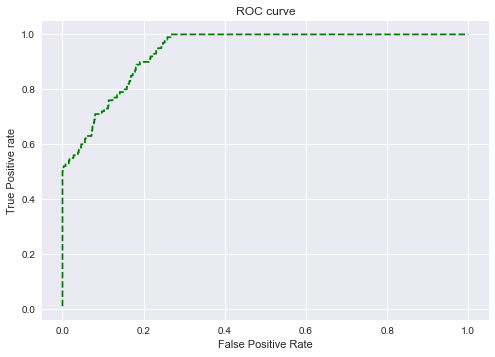

In [18]:
import scikitplot as skplt
import matplotlib.pyplot as plt

#y_true = df_task1["y"]
#y_probas = df_task1["proba"]
#skplt.metrics.plot_roc_curve(y_true, y_probas)
#plt.show()
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_array, tpr_array, linestyle='--',color='green')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [19]:
#reading File 5(c) and Copying the datataframe
df_task3=pd.read_csv('C:\\Users\\anmol\\Downloads\\5_Performance_metrics-20211106T140435Z-001\\5_Performance_metrics\\5_c.csv')
dfAUCTask3 = df_task3.copy(deep=True)


#This method is used to calculate tthe Basic Parameters like TN,TP,FN,FP, Confusion Matrix, Recall,F1 Score and Precision Score

def BasicParametersTask3(df):
    df.loc[((df['prob']>=0.5)),'y_predicted'] = 1
    df['y_predicted'] = df['y_predicted'].fillna(0)
    
    #Molding DataFrame for TN,TP,FN and FP
    
    df['True_Positive'] = np.where((df['y']==1)&(df['y_predicted']==1),"Yes",np.nan)
    df['True_Negative'] = np.where((df['y']==0)&(df['y_predicted']==0),"Yes",np.nan)
    df['False_Positive'] = np.where((df['y']==0)&(df['y_predicted']==1),"Yes",np.nan)
    df['False_Negative'] = np.where((df['y']==1)&(df['y_predicted']==0),"Yes",np.nan)
    
    #Calculating TN,TP,FN and FP
    TP=df.loc[df.True_Positive == "Yes",'True_Positive'].count()
    TN=df.loc[df.True_Negative == "Yes",'True_Negative'].count()
    FP=df.loc[df.False_Positive == "Yes",'False_Positive'].count()
    FN=df.loc[df.False_Negative == "Yes",'False_Negative'].count()
    
    confusion_matrix= [[TN,FN],[FP,TP]]
    #Confusion Matrix
    print("Confusion Matrix is: ")
    print(confusion_matrix)
    
    #Calculation Precision
    precision = (TP)/(TP+FP)
    #Calculating Recall
    Recall = (TP)/(TP+FN)
    #Calculating F1 Score
    F1_Score = 2*((precision*Recall)/(Recall+precision))
    print("F1 Score is: "+str(F1_Score))
    
    Accuracy_Score = (TN+TP)/(TP+TN+FP+FN)
    print("Accuracy Score is: "+str(Accuracy_Score))
    df = pd.DataFrame(None)

BasicParametersTask3(dfAUCTask3)
#Printinting Basic Parameters of Task -3

Confusion Matrix is: 
[[1637, 462], [168, 585]]
F1 Score is: 0.65
Accuracy Score is: 0.7791023842917251


In [20]:
#This method will create Matric A also TPR and FPR
def compute_tpr_fpr_task3(dataframe):
    dataframe['True_Positive'] = np.where((dataframe['y']==1)&(dataframe['y_predicted']==1),"Yes",np.nan)
    dataframe['True_Negative'] = np.where((dataframe['y']==0)&(dataframe['y_predicted']==0),"Yes",np.nan)
    dataframe['False_Positive'] = np.where((dataframe['y']==0)&(dataframe['y_predicted']==1),"Yes",np.nan)
    dataframe['False_Negative'] = np.where((dataframe['y']==1)&(dataframe['y_predicted']==0),"Yes",np.nan)
    
    #Calculating TN,TP,FN and FP
    TP=dataframe.loc[dataframe.True_Positive == "Yes",'True_Positive'].count()
    TN=dataframe.loc[dataframe.True_Negative == "Yes",'True_Negative'].count()
    FP=dataframe.loc[dataframe.False_Positive == "Yes",'False_Positive'].count()
    FN=dataframe.loc[dataframe.False_Negative == "Yes",'False_Negative'].count()
    TPR = TP/(FN+TP)
    FPR= FP/(FP+TN)
    A = ((500*FN)+(100*FP))
    
    dataframe = pd.DataFrame(None)
    return TPR,FPR,A

In [21]:

#This code is use to find the threshold which gives minimum of A

df3_task3 = dfAUCTask3.copy(deep=True)
df2_task3=df3_task3.copy(deep=True)
predicted_prob = df2_task3["prob"].values
thresholds = sorted(predicted_prob,reverse=True)
print()
#Computing TPR and FPR Array
tpr_array = []
fpr_array =[]
threshold_final = 0
count=0
temp=0
temp_A=0
for threshold in thresholds:
    df2_task3=df3_task3.copy(deep=True)
    threshold= threshold
    df2_task3.loc[((df2_task3['prob']>=threshold)),'y_predicted'] = 1
    df2_task3['y_predicted'] =df2_task3['y_predicted'].fillna(0)
    tpr,fpr,A = compute_tpr_fpr_task3(df2_task3)
    
    if count==0:
        temp=A
        temp_A=A
    else:
        temp=A
    if A<temp_A:
        temp_A=A
        threshold_final = threshold
    tpr_array.append(tpr)
    fpr_array.append(fpr)
    count=count+1
    temp=0

In [22]:
print("Value of least A is: "+str(temp_A))
print("Value of threshold which give least value of A is: "+str(threshold_final))

Value of least A is: 141000
Value of threshold which give least value of A is: 0.2300390278970873



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [3]:
#reading File 5(d) and Copying the datataframe
df_task4=pd.read_csv('C:\\Users\\anmol\\Downloads\\5_Performance_metrics-20211106T140435Z-001\\5_Performance_metrics\\5_d.csv')
dfMAPETask4 = df_task4.copy(deep=True)

In [33]:
print(df_task4.head(10))

       y   pred
0  101.0  100.0
1  120.0  100.0
2  131.0  113.0
3  164.0  125.0
4  154.0  152.0
5  133.0  153.0
6  148.0  139.0
7  172.0  145.0
8  153.0  162.0
9  162.0  154.0


In [24]:
MSE = np.square(np.subtract(df_task4['y'],df_task4['pred'])).mean()
print("Mean Squared Error is: "+str(MSE))

Mean Squared Error is: 177.16569974554707


In [7]:
#Replace all the Value of Zero's with Average of all the values in "y"
#Mean_of_Y = dfMAPETask4['y'].mean()
#dfMAPETask4['y'].replace(['0', '0.0',0,"NaN","nan"],Mean_of_Y, inplace=True)
#MAPE = np.mean(np.abs((dfMAPETask4['y'] - dfMAPETask4['pred'])/Mean_of_Y))
#print("Value of MAPE using Method -1 is: "+str(MAPE))


numerator_df = abs(dfMAPETask4['y'].values - dfMAPETask4['pred'].values)
num = numerator_df.sum()
denominator_df = dfMAPETask4['y'].values
den = denominator_df.sum()
print("Value of MAPE is: "+str(num/den))


#I didn't get 0.1291202994009687

Value of MAPE is: 0.1291202994009687


In [35]:
#Got this code from https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy

#Modified the code according and set degree =1 for Linear Fit Regression
def GetRSquare(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] =((ssreg / sstot))

    return results

In [36]:
x=df_task4["y"].reset_index(drop=True)
y=df_task4["pred"].reset_index(drop=True)
Res = GetRSquare(x,y,1)

In [37]:
print("Value of R Square is: "+str(Res['determination']))

Value of R Square is: 0.956360040988057
